Libraries

In [85]:
%reset

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Code

In [2]:
def solver_TDMA(a,b,c,d):
    '''b---> diagonal numpy array
        a--> lower triangle
        c--> upper triangle
        d--> matrix at right'''
    n=b.shape[0]
    ac,bc,cc,dc=map(np.array,(a,b,c,d)) #creating copy of elements
    # FoRWARD elimination
    for i in range(1,n):
        m=ac[i-1]/bc[i-1]
        bc[i]=bc[i]-m*cc[i-1]
        dc[i]=dc[i]-m*dc[i-1]
    #Backward substitution
    x=np.zeros((n,))
    for i in range(n-1,-1,-1):
        if (i==(n-1)):
            x[n-1]=dc[n-1]/bc[n-1]
        else:
            x[i]=(dc[i]-cc[i]*x[i+1])/bc[i]



    return x

               

# PROJECT 1

In [12]:
n=22 # number of points= number of equally spaced +1
b=(-2)*np.ones((n-2,))
a=np.ones((n-3,))
c=np.ones((n-3,))
d=np.zeros((n-2,))
d[len(d)-1]=-1


In [52]:
#x=solver_TDMA(a,b,c,d)
xv=1
xc1 =np.array(solver_TDMA(a,b,c,d))
xc1=np.append(xc1,xv)
#xc1[len(xc1)-1]
xc1=np.insert(xc1,0,0.)
xc1

array([0.        , 0.04761905, 0.0952381 , 0.14285714, 0.19047619,
       0.23809524, 0.28571429, 0.33333333, 0.38095238, 0.42857143,
       0.47619048, 0.52380952, 0.57142857, 0.61904762, 0.66666667,
       0.71428571, 0.76190476, 0.80952381, 0.85714286, 0.9047619 ,
       0.95238095, 1.        ])

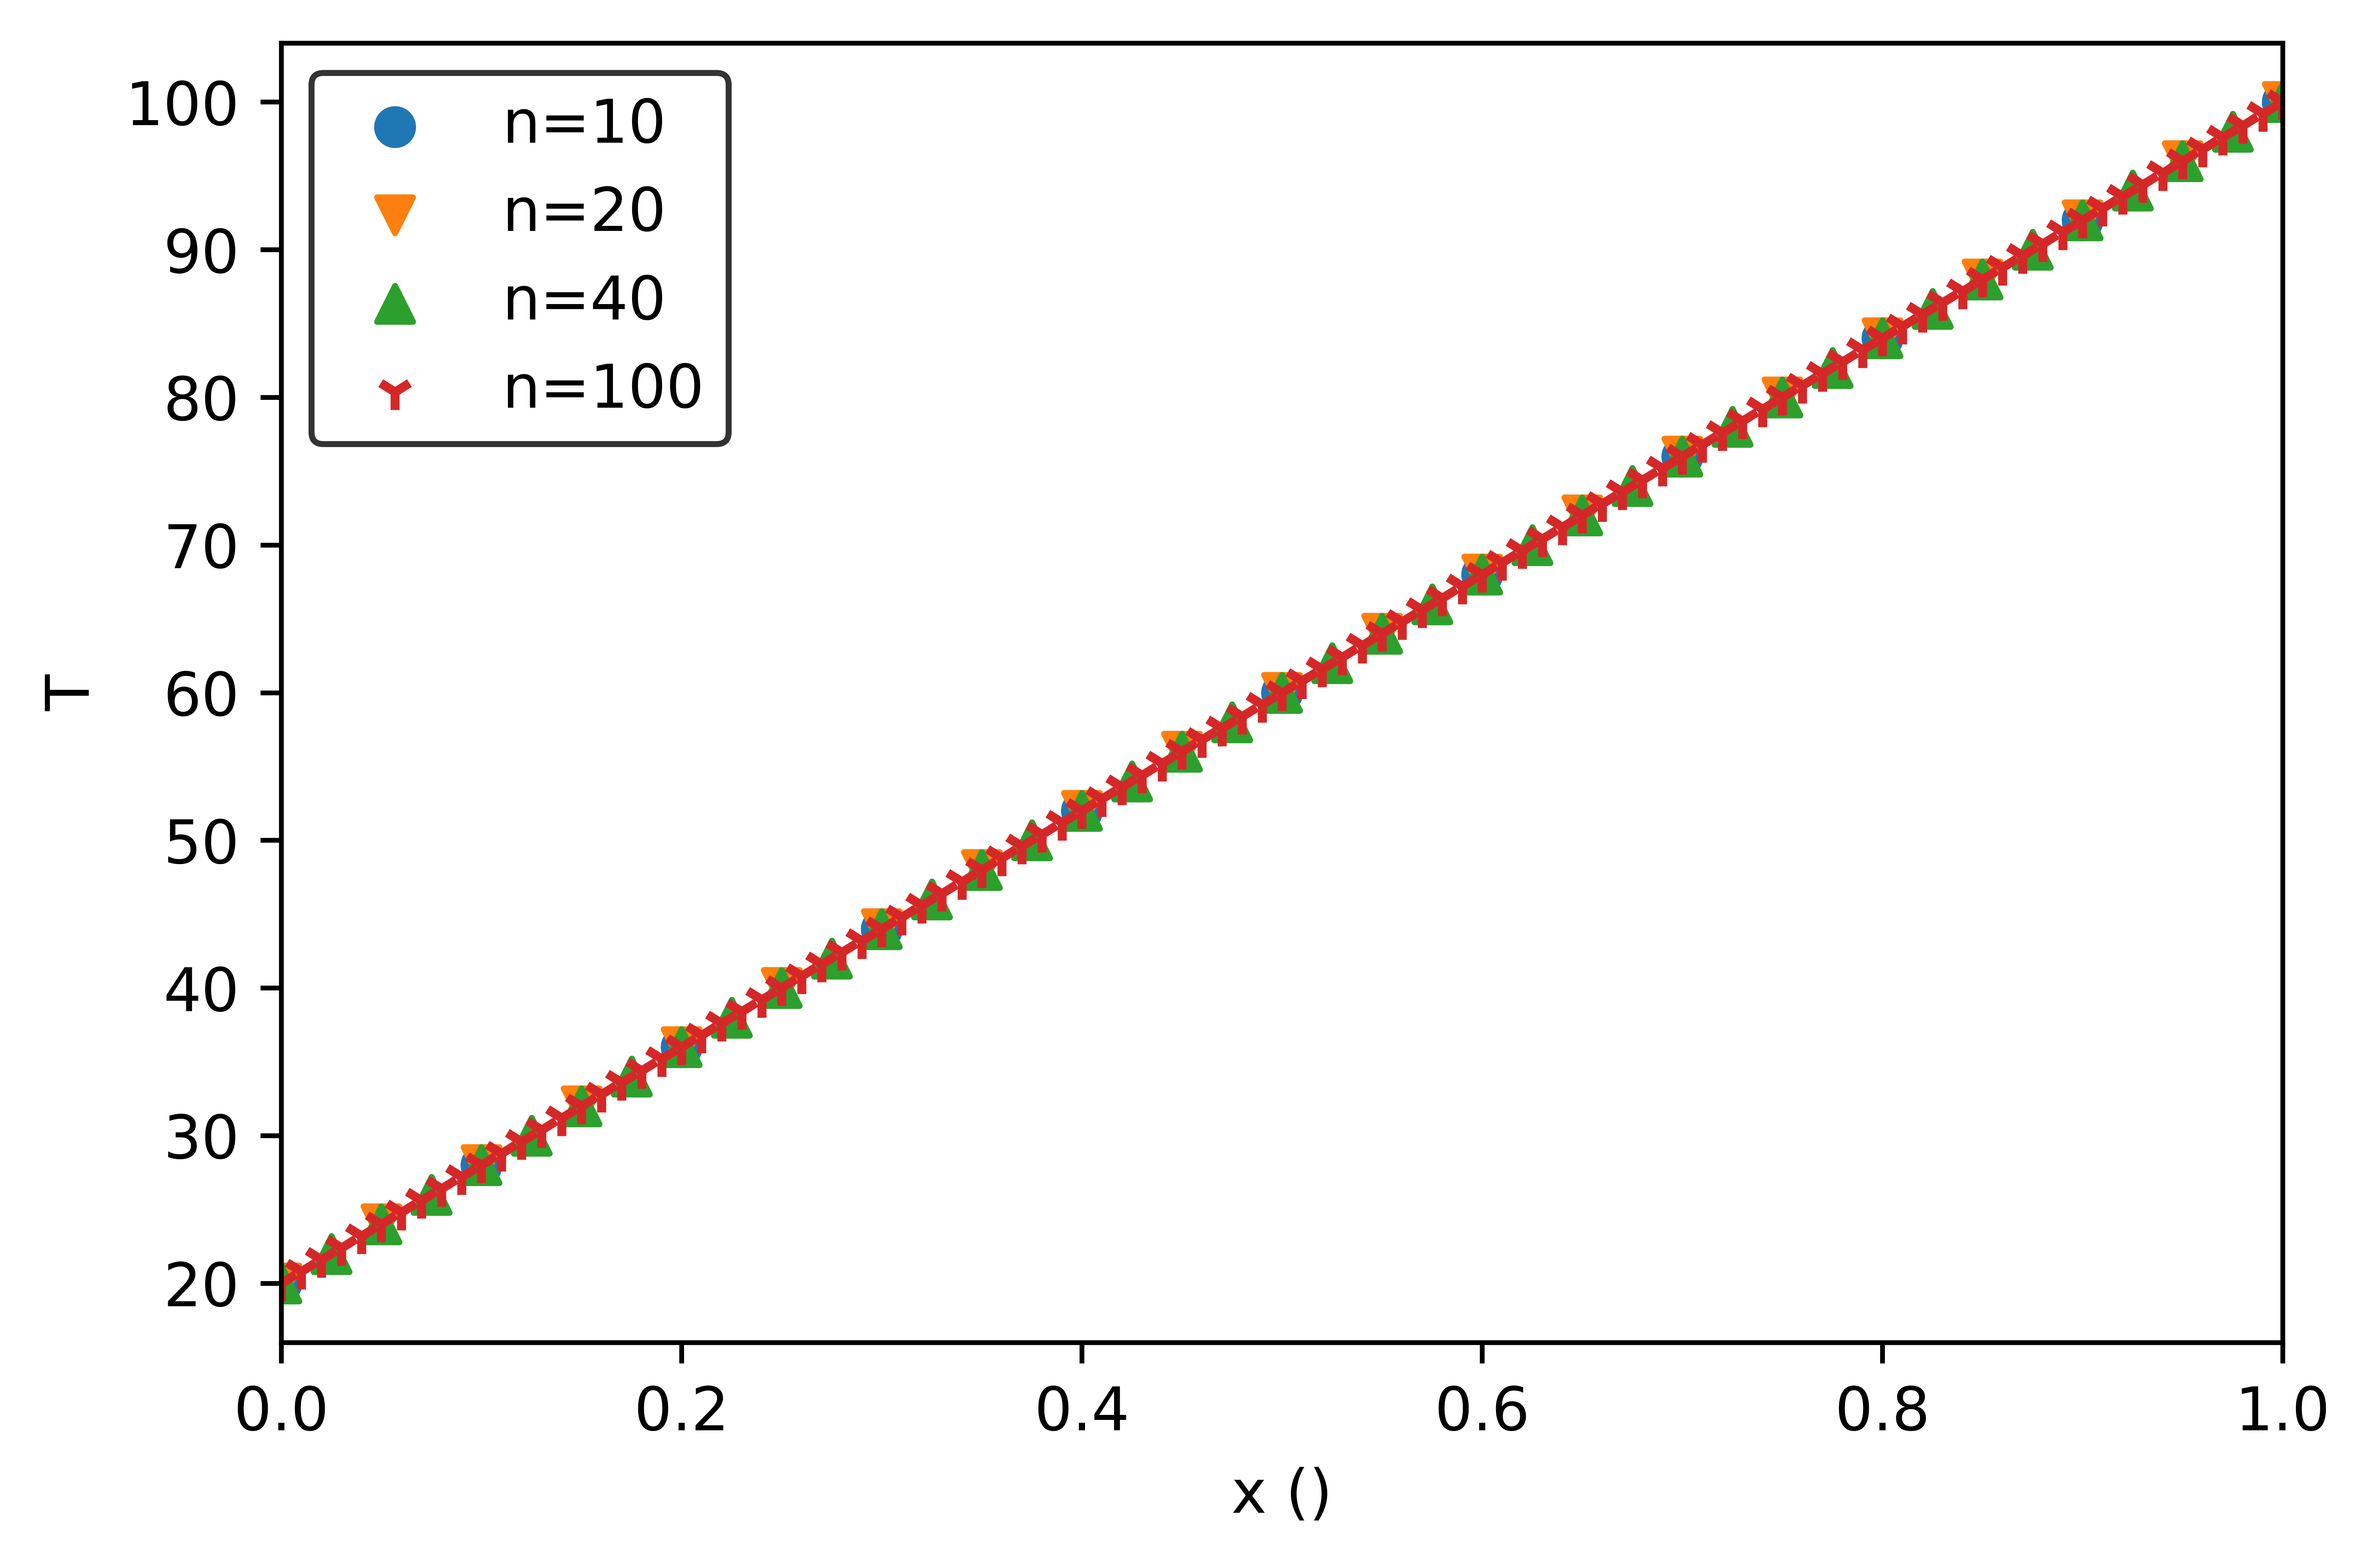

In [90]:
BC_right=100
BC_left=20
nx=[11,21,41,101]
mark=["o","v","^","1"]
l=0
plt.figure(dpi=1200)
for i in nx:#reversed(nx):
    b=(-2)*np.ones((i-2,))
    a=np.ones((i-3,))
    c=np.ones((i-3,))
    d=np.zeros((i-2,))
    d[0]=-BC_left
    d[len(d)-1]=-BC_right
    x=solver_TDMA(a,b,c,d)
    x=np.append(x,BC_right)
    x=np.insert(x,0,BC_left)
    y=np.linspace(0,1,i)
    #plt.plot(y,x,label='n='+str(i-1))
    plt.scatter(y,x,label='n='+str(i-1),marker=mark[l])
    l=l+1
plt.xlim(0.0,1.0)
plt.xlabel('x ()')
plt.ylabel('T')
plt.legend(edgecolor='black') 
plt.show() 
  
    

Testing

In [ ]:
a = np.array([3.,1,3]) 
b = np.array([10.,10.,7.,4.])
c = np.array([2.,4.,5.])
d = np.array([3,4,5,6.])

#ac,bc,cc,dc=map(np.array,(a,b,c,d))
#aa,bb,cc,dd=np.copy([a,b,c,d])
#aa,bb,cc,dd=np.copy((a,b,c,d))
#aa,bb,cc,dd=np.array((a,b,c,d),copy=True)

In [65]:
a=np.zeros((3,4))

In [66]:
'''a = np.array([3.,1,3]) #float due to 3.
a = np.array([3.,1,3]) #int as . is removed '''
a = np.array([3,1,3],dtype=float) #proper way of initialising
a.dtype

dtype('float64')

In [73]:
n=b.shape[0]
for i in range(1,n):
    print(i-1)

0
1
2


In [68]:
aa.dtype
aa.shape[0]
b.shape
ac[2]

NameError: name 'aa' is not defined

In [102]:
s=np.zeros((3,))
s[0]

0.0

In [19]:
alpha=1
beta =2
print(beta)
del (alpha,beta)


2


In [31]:
alpha=np.ones((3,))
beta=np.zeros((3,))
#np.delete(alpha,0,axis=0)
alpha=np.ones((2,))
alpha

array([1., 1.])

In [53]:
np.linspace(0,1,num=10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

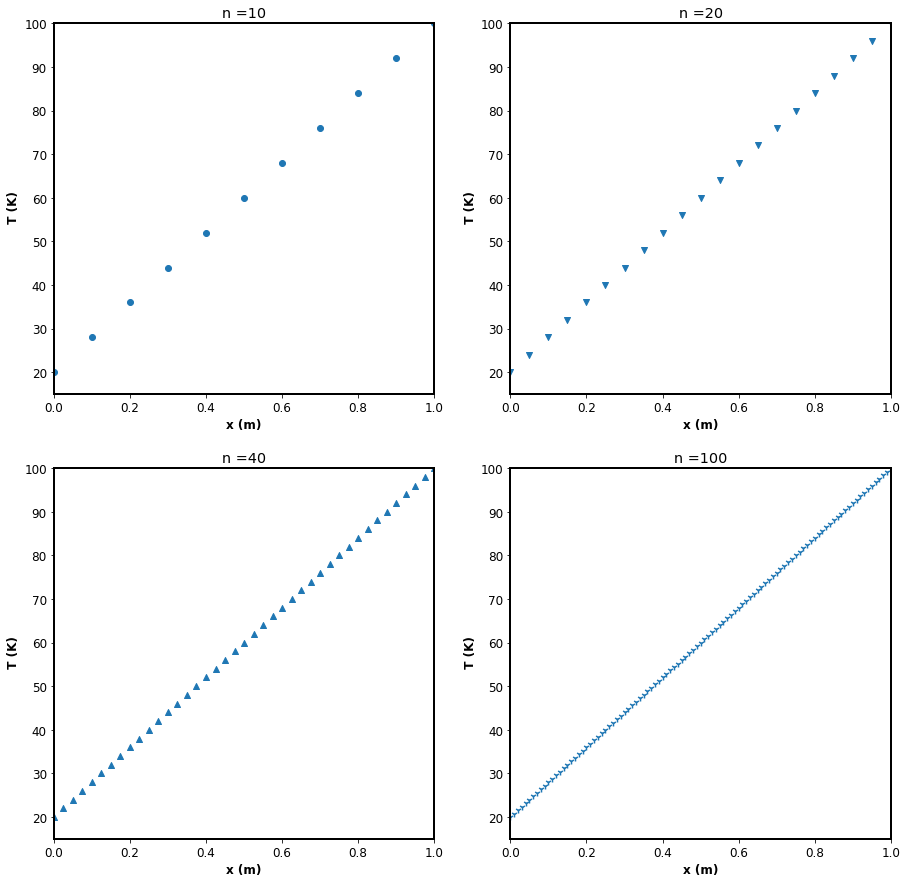

<Figure size 7200x4800 with 0 Axes>

In [132]:
BC_right=100
BC_left=20
nx=[11,21,41,101]
mark=["o","v","^","1"]
l=0
fig, axs = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='b')
fig.subplots_adjust(hspace = .2, wspace=.2)
plt.figure(dpi=1200)
plt.rcParams.update({'font.size':12})
axs = axs.ravel()
color = cm.rainbow(np.linspace(0, 1, 4))
#plt.figure(dpi=1200)
for i in nx:#reversed(nx):
    b=(-2)*np.ones((i-2,))
    a=np.ones((i-3,))
    c=np.ones((i-3,))
    d=np.zeros((i-2,))
    d[0]=-BC_left
    d[len(d)-1]=-BC_right
    x=solver_TDMA(a,b,c,d)
    x=np.append(x,BC_right)
    x=np.insert(x,0,BC_left)
    y=np.linspace(0,1,i)
    #plt.plot(y,x,label='n='+str(i-1))
    #plt.scatter(y,x,label='n='+str(i-1),marker=mark[l])
    axs[l].scatter(y,x,marker=mark[l],color='au')
    axs[l].set_xlim(left=0,right=1)
    axs[l].set_ylim([BC_left-5,BC_right])
    axs[l].set_xlabel('x (m)',fontsize=12,fontweight='bold')
    axs[l].set_ylabel(' T (K)',fontsize=12,fontweight='bold')
    axs[l].set_title('n ='+str(i-1))
    for s in ["bottom","top","left","right"]:
        axs[l].spines[s].set_linewidth(2)
    l=l+1
'''plt.xlim(0.0,1.0)
plt.xlabel('x ()')
plt.ylabel('T')
plt.legend(edgecolor='black') 
plt.show() 
  '''
del(a,b,c,d,x,y)

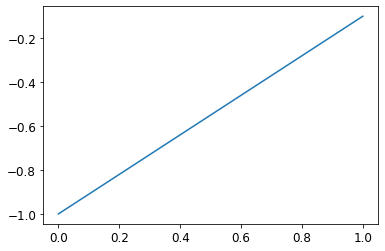

In [141]:
#for non-dimensionalised flux at inlet
BC_right=0
n=11
b=(-2)*np.ones((n-1,))
b[0]=-1#due to flux
a=np.ones((n-2,))
c=np.ones((n-2,))
d=np.zeros((n-1,))
d[0]=1/(n-1)
d[len(d)-1]=0
x=solver_TDMA(a,b,c,d)
y=np.linspace(0,1,10)
plt.plot(y,x)

In [ ]:
length =1
n=11
dx=1/(n-1)
k_cond=1
flux=1
gen=1
bc_right=1
b=(-2)*np.ones((n-1,))
b[0]=-1#due to flux
a=np.ones((n-2,))
c=np.ones((n-2,))
d=np.ones((n-1,))*(-gen/k_cond)*(dx*dx)
d[0]=(-flux/k_cond)*dx
d[len(d)-1]=d[len(d)-1]-bc_right

In [ ]:
'''sum=0
for i in x:
    sum=sum+i*i 

math.sqrt(sum)
'''
np.linalg.norm(x) #similar to above

'''x.shape
y.shape

x_true.shape'''

# PROJECT 2

$$ \frac {\partial{x} }{\partial{y}} 